# Ejercicio 1

Una palabra es monovocalica si tiene solamente una vocal (quizds repetida  varias veces), por ejemplo, “casa” sdlo tiene la ‘a’. Se tiene una lista L de  n palabras. Para cada vocal, se quiere encontrar su palabra monovocalica  mas grande en L.  Nota. A todas las variantes de una vocal (maytiscula, mintiscula, acentos,  etc.) las consideramos la misma.  
$\textbf{Instancia:}$ Encontrar las palabras monovocalicas mas grandes para cada  vocal de la lista en el archivo espanol.txt. 

Tipo de Problema: 
- Es un problema de Optimizacion pues queremos encontrar para cada vocal la palabra monovocalica mas grande
- Pero tambien es del tipo enlistar pues queremos ver y en listar las palabras que cumplen con la condicion de ser monovocalicas y de este modo enocontrar la mas grende entre ellas  

Fuerza bruta:

El espacio de estados lo podemos ver como n el numero de palabras y m la longitud promedio de las palabras, entonces podemos decir que el espacio de estados es de O(n*m) pues para cada palabra de longitud m debemos de examinar los m caracteres de la palabra.El tamaño del espacio depende de n (el numero de palabras) y (la longitud promedio de las palabras) 

Ahora bein el tiempo de ejecucion del algoritmo es de que para cada palabra en L , reocrre cada letra de la palabra para identifiacr las vocales presentes , en cada una verifica si la palabra es monovocalica y si es compara su longitud con la actual palabra mas grande para esa vocal. Por lo que es de O(n*m)


Heurísticas:

Vamos a utilizar recorte de estados para tomar las vocales de las plabras con acnetos y mayusculas para tomarlas todas como una misma , y asi vamos a reducir la complejidad a la hora de comoarar vocales.

Posteriormente vamos a utilizar a utilizar algoritmo voarz de modo que procesamos para cada palabra que proecesemos, mantenemos para cada vocal la palabra monovocalica mas grande hasta el momento

Algoritmo:

Inciamos  creando un diccionario que almacene para cada vocal('a', 'e', 'i', 'o', 'u') la plabra mas garande encontrada 

Despues para cada palabra en L la normalizamos (convenir a minusculas y remplazar las letras acentudas con letras sin acentuar), procedenmos a ver el conjuntos de vocales presentes en la palabra, si el conjunto de las tiene tamaño 1(solo hay una vocal) y pertenece al diccionario del incio , notnces comparamos la longitud de la palabra con la almacenda para esa vocal en el diccionario, si la palabra es mas garande actualizamos el diccionario con esa palabra 

Correctitud: Se ve claramente que para cada vocal , siempre se tiene la palabra monovocalica mas larga hasta el momento y que acabando se tendra la mas larga

Tiempo de ejecucion:

Sea n: Numero total de palabras en la lista L

m : Longitud promedio de las palabras en L

$m_{max}$: Longitud maxima de una palabra en L

$\sum m_{i}$ Suma de las longitudes de todas las plabras en L

- El algoritmo procesa cada palabra una vez, convierte a minúsculas.
 y reemplazar vocales acentuadas por su equivalente sin acento
$O(m_i) $

- Identificar si es una vocal y añade al conjunto  para solo  tener vocales únicas $O(m_i)$

- Verificar el tamaño del conjunto de vocales $O(1)$

- Actualizar el resultado, comparar la longitud de la palabra actual con la almacenada para la vocal y actualizar el diccionario con la mas larga , en caso de que sea $O(1)$

El tiempo total es de: $O(m_i + m_i +1 +1)$ = $O(2m_i +2)$ por plabra es $O(m_i)$

Por todo el texto debe de ser de 
$$
O (\sum_{i=1}^{n} m_i )
$$

In [2]:
import re

In [12]:
def palabra_sinacentosymin(palabra):
    reemplazos = {
        'á': 'a', 'à': 'a', 'ä': 'a', 'â': 'a', 'ã': 'a',
        'é': 'e', 'è': 'e', 'ë': 'e', 'ê': 'e',
        'í': 'i', 'ì': 'i', 'ï': 'i', 'î': 'i',
        'ó': 'o', 'ò': 'o', 'ö': 'o', 'ô': 'o', 'õ': 'o',
        'ú': 'u', 'ù': 'u', 'ü': 'u', 'û': 'u',
        'Á': 'a', 'À': 'a', 'Ä': 'a', 'Â': 'a', 'Ã': 'a',
        'É': 'e', 'È': 'e', 'Ë': 'e', 'Ê': 'e',
        'Í': 'i', 'Ì': 'i', 'Ï': 'i', 'Î': 'i',
        'Ó': 'o', 'Ò': 'o', 'Ö': 'o', 'Ô': 'o', 'Õ': 'o',
        'Ú': 'u', 'Ù': 'u', 'Ü': 'u', 'Û': 'u'
    }
    regex = re.compile('|'.join(re.escape(k) for k in reemplazos.keys()))
    return regex.sub(lambda x: reemplazos[x.group()], palabra.lower())

In [13]:
def palabras_monovocalicas(L):
    vocales = {'a', 'e', 'i', 'o', 'u'}
    resultado = {vocal: '' for vocal in vocales}
    for palabra in L:
        palabra_normal = palabra_sinacentosymin(palabra)
        vocales_palabra = set(filter(lambda c: c in vocales, palabra_normal))
        if len(vocales_palabra) == 1:
            vocal = vocales_palabra.pop()
            if len(palabra) > len(resultado[vocal]):
                resultado[vocal] = palabra
    return resultado

In [16]:
def main():
    with open(r"C:\Users\ENRIQUE\Downloads\espanol.txt", 'r', encoding='latin-1') as f:
        L = [line.strip() for line in f if line.strip()]

    resultado = palabras_monovocalicas(L)

    for vocal in sorted(resultado.keys()):
        print(f"Vocal '{vocal}': {resultado[vocal]}")

if __name__ == "__main__":
    main()

Vocal 'a': chabancanadas
Vocal 'e': efervescentes
Vocal 'i': infringir
Vocal 'o': bochornosos
Vocal 'u': dumdum


# Ejercicio 2

En un cuadrado de n x n dividido en cuadraditos de 1 x 1 se ha colocado  un punto rojo en algunos de sus cuadraditos.¿Se podra elegir uno de los  subcuadrados de 4 x 4 que no tenga ningtin punto rojo?
 
![Figura 1](./Fig1.png)

Por ejemplo, en la Figura 1, del lado izquierdo hay un acomodo de puntos  rojos en el que no se puede poner ningtin cuadrado de 4 x 4 sin puntos  rojos, pero en el de la derecha si se puede poner al cuadrado sombreado  en verde.    
$\textbf{Instancia:}$ Considera el tablero de 100 x 100 en donde el cuadradito (i, j)  es el que esta en la fila i y columna j. Pondremos un punto rojo en (i, j) si  i+ J es un ntimero primo. Resuelve el problema para este caso. Interpreta  tu respuesta. 

Tipo de problema:

Es de decision pues son preguntas de si o no

Fuerza Bruta: 

Sin sumas acumuladas, para cada posible posición del cuadrado, tendríamos que sumar los valores de sus 16 celdas individualmente.Número de posibles posiciones es de (n -3) * (n-3), el cual es nuetro espacio de estados , las operaciones totales es de $O(n^2 *16)$ = $O(n^2)$  pero con un facor de salto constante

Heuristica: 

Utilizaremos programacion dinamica para calcular rápidamente la suma de valores en cualquier submatriz del tablero, reutilizando cálculos previos y reduciendo la complejidad computacional.
- Primero Creamos una matriz bidimensional tablero de tamaño n×n para cada celda (i,j) del tablero puede tener dos valores, de modo que 1 si es rojo y 0 si vacia
- Creamos una matriz 'pr_acumulados' de tamaño (n+1)×(n+1) para almacenar las sumas acumuladas hasta cada posición y la froma de calcularlos es :

  pr_acumulados[i][j]=pr_acumulados[i−1][j]+pr_acumulados[i][j−1]−pr_acumulados[i−1][j−1]+tablero[i−1][j−1]
  Esto nos permite obtener el número total de puntos rojos en el rectángulo definido desde la esquina superior izquierda (0,0) hasta la posición (i−1,j−1).
- Ahora recorremos todas las posibles posiciones donde el cuadrado de 4×4 puede ubicarse en el tablero. Estas posiciones son aquellas donde la esquina inferior derecha del cuadrado está en (i,j) con i,j≥4 para cada posición, calculamos la suma de puntos rojos dentro del cuadrado utilizando la matriz de sumas acumuladas: 

  suma_cuadrado=pr_acumulados[i][j]−pr_acumulados[i−4][j]−pr_acumulados[i][j−4]+pr_acumulados[i−4][j−4]

  Si la suma_cuadrado=0, significa que no hay puntos rojos en ese cuadrado y hemos encontrado una solución.


Ahora la matriz de sumas acumuladas permite calcular rápidamente la suma de cualquier submatriz del tablero. La fórmula utilizada se basa en la inclusión-exclusión: 
- La suma hasta (i,j): pr_acumulados[i][j]=suma desde (0,0) hasta (i−1,j−1)

- La suma de un subcuadro de 4×4: Para calcular la suma en el cuadrado definido por las esquinas (i−4,j−4) y (i−1,j−1): suma_cuadrado=pr_acumulados[i][j]−pr_acumulados[i−4][j]−pr_acumulados[i][j−4]+pr_acumulados[i−4][j−4]

Esto ultimo por que: 
- pr_acumulados[i][j]: Suma total desde (0,0) hasta (i−1,j−1).
- Restamos pr_acumulados[i−4][j]: Eliminamos la parte superior del rectángulo que está por encima del cuadrado de interés.
- Restamos pr_acumulados[i][j−4]: Eliminamos la parte izquierda del rectángulo que está a la izquierda del cuadrado de interés.
- Sumamos pr_acumulados[i−4][j−4]: Agregamos nuevamente el área que se ha restado dos veces.

Complejidad: las sumas acumuladas las recorremos cada celda del tablero una vez entonces es de $O(n^2)$ , la verificacion de cuadrado, recorremos todas las posibles posiciones de la esquina inferior derecha del cuadrado. Hay (n−3)×(n−3) posiciones posibles cada verificación se realiza en tiempo constante por lo que la complejidad es de $O(n^2)$
por lo que en total es de $O(n^2)$

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

Se encontró un cuadrado sin puntos rojos en la posición (0, 90)


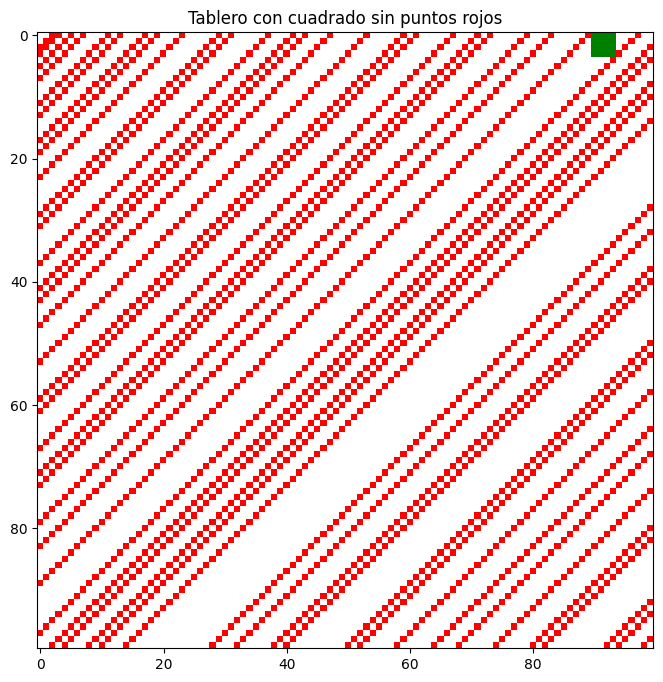

In [66]:
def crear_tablero(n, nr):
    tablero = [[0] * n for _ in range(n)]
    for i, j in nr:
        tablero[i][j] = 1  # Marcamos los puntos rojos
    return tablero

def arco(n, nr):
    tablero = crear_tablero(n, nr)  
    r_en_n = [[0] * (n + 1) for _ in range(n + 1)]
    for i in range(1, n + 1):
        for j in range(1, n + 1):
            r_en_n[i][j] = (r_en_n[i - 1][j] + r_en_n[i][j - 1] -
                             r_en_n[i - 1][j - 1] + tablero[i - 1][j - 1])
            if i >= 4 and j >= 4:
                total_puntos = (r_en_n[i][j] - r_en_n[i - 4][j] -
                                r_en_n[i][j - 4] + r_en_n[i - 4][j - 4])
                if total_puntos == 0:
                    return True, i - 4, j - 4
    return False, -1, -1

def primo(n):
    if n <= 1:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True

primos = []
for i in range(100):
    for j in range(100):
        if primo(i + j):
            primos.append((i, j))

les, i0, j0 = arco(100, primos)
if les:
    print(f"Se encontró un cuadrado sin puntos rojos en la posición ({i0}, {j0})")
else:
    print("No se encontró un cuadrado sin puntos rojos")

tablero = crear_tablero(100, primos)
tablero_np = np.array(tablero)

if les:
    tablero_np[i0:i0 + 4, j0:j0 + 4] = 2  

color_map = {0: 'white', 1: 'red', 2: 'green'}
cmap = colors.ListedColormap([color_map[i] for i in sorted(color_map)])
plt.figure(figsize=(8, 8))
plt.imshow(tablero_np, cmap=cmap)
plt.title("Tablero con cuadrado sin puntos rojos" if les else "Tablero sin cuadrado libre")
plt.show()


# Ejercicio 3

Una subpalabra de una palabra P consiste de tomar algunas letras de P  de izquierda a derecha, no necesariamente de manera consecutiva. Por  ejemplo. la palabra casa tiene las 13 subpalabras a c, a, s, ca, cs, as, aa,  Sa, cas, caa, csa, asa, casa. No tiene como subpalabra a sc, pues estas  letras no aparecen en ese orden en casa. La palabra vacia nunca cuenta.  Dada una palabra con n letras, ¿Cuentas subpalabras tiene?   

$\textbf{Instancia:}$ ¿Cuantas subpalabras tiene la siguiente palabra? 

Tipo de problema:
Es del tipo conteo pues nos pide determinar cuantas subpalabras distientas tiene una plabra dada.

Fuerza Bruta:

El espacio de estados consiste en todas las posibles subsecuencias no vacias de la palabra dada, ya que en una plabra hay una longitud de n, hay $2^n -1$ posibles subconjuntos no vacios,ahora como cada letra puede estar presente o no en el suconjutno, excepto para el subconjunto vacio no lo contamos. El tamaño es de $O(2^n)$ y el tiempo requiere lo mismo debido a posibles repeticiones de letras, necesitamos almacenar y compar los subconjuntos para eliminar duplicados; pero agregamos que  podemos construir la subsecuencia en tiempo $O(n)$ de modo que nos queda como $O(n*2^n)$

Heuristica: 

Utilice progrmacion dinamica para calcular el número de subpalabras distintas sin generar todas las subsecuencias explícitamente, mantenemos un arreglo dp donde dp[i] es el número de subpalabras distintas utilizando los primeros i caracteres de la palabra y utilizamos un diccionario última_ocurrencia para rastrear la última posición donde apareció cada carácter y así evitar contar subpalabras duplicadas.

- Primero inicializar dp[0] = 1 toma tiempo constante $O(1)$
- Despues recorremos la palabra desde i=1 hasta n de modo de que en cada iteración calculamos dp[i] = 2 * dp[i - 1], si el carácter actual ha aparecido antes, restamos dp[j - 1] para eliminar subpalabras duplicadas por lo que actualizamos última_ocurrencia[char] = i. Las operaciones dentro del bucle son de tiempo constante $O(1)$ por iteración.
-  Ahora las búsquedas y actualizaciones en última_ocurrencia son operaciones de tiempo promedio $O(1)$ si utilizamos un diccionario hash(que es nuestro caso)


Correctitud:En el caso de una palabra vacía, hay 0 subpalabras. Al agregar un acaracter nuevo, se duplica las plabras existentes y agergamos el nuevo caracter a ellas. Si el carcater existia restamos las combinaciones que causarian los duplicados de modo que al restar  dp[j-1], eliminamos los subconjunots que ya se contaron con la ocurrencia anterior del carácter.

Tiempo:
- Inciaalizar dp[0] = 1 toma tiempo $O(1)$
- Las operaciones dentro del bucle son de tiempo constante $O(1)$ por iteración.Como el bucle se ejecuta n veces
- Por ultimo las úsquedas y actualizaciones en última_ocurrencia son operaciones de tiempo promedio $O(1)$ si utilizamos un diccionario hash( que es nuestro caso)

Por lo que el tiempo total es de $O(n)$


In [35]:
def contar_sub(palabra):
    n = len(palabra)
    dp = [0] * (n + 1)
    dp[0] = 1  
    u_ocurrencia = {}
    
    for i in range(1, n + 1):
        char = palabra[i - 1]
        dp[i] = 2 * dp[i - 1]
        
        if char in u_ocurrencia:
            j = u_ocurrencia[char]
            dp[i] -= dp[j - 1]
        
        u_ocurrencia[char] = i
    
    total_subpalabras = dp[n] - 1
    return total_subpalabras

if __name__ == "__main__":
    palabra = input("Ingrese la palabra: ")
    resultado = contar_sub(palabra)
    print("El número de subpalabras distintas:", resultado)


El número de subpalabras distintas: 1797059


# Ejercicio 4

Se tienen n ntimeros enteros alrededor de un circulo, quizas algunos de ellos  negativos. Disena un algoritmo que encuentre cual es el arco consecutivo  de ntimeros consecutivos cuya suma sea mayor. 


![Figura 2](./Fig2.png)

$\textbf{Instancia:}$ Resuelve el problema para la Figura 2. Por ejemplo (9, −9, 30, −31, −14, 7, −5)  son numeros que estén en un arco consecutivo de numeros.

Tipo de problema:

Es del tipo de optimizacion pues buscamos encontrar el arco consecutivo de números cuya suma sea máxima en un arreglo circular.

Fuerza bruta:

El espacio de estados en el enfoque de fuerza bruta, consideramos todos los posibles arcos consecutivos en el arreglo circular. Para un arreglo circular de longitud  𝑛, cada arco consecutivo puede empezar en cualquier posición y tener una longitud de 1 hasta 𝑛. Por lo que el toal de arcos posibles es de n×n=$n^2$ por ,o que es de $O(n^2)$y el tiempo es de $O(n^3)$ pues para cada uno de los $𝑛^2$ arcos, necesitamos calcular la suma de los elementos en ese arco ahora sin preprocesamiento, calcular la suma de un arco de longitud 𝑘 toma $𝑂(𝑘)$ tiempo en el peor caso, el arco puede tener longitud 𝑛. 

Heuristica:

Use algoritmos voraces (Greedy) pues utilice una adaptación del algoritmo de Kadane para arreglos circulares y ademas de recursión y teorema maestro ya que aunque no hay recursión directa, aplique principios de eficiencia similares.

- Primero veamos el problema de encontrar la máxima suma de un subarreglo en un arreglo circular se puede resolver observando que la máxima suma puede ser:
  - Que a máxima suma se encuentra en un subarreglo no circular (no envuelve el final y el inicio del arreglo). Podemos encontrarla usando el algoritmo de Kadane estándar.
  - O bien que la máxima suma se encuentra en un subarreglo circular (envuelve el final y el inicio del arreglo). En este caso, podemos pensar que la suma máxima circular es igual a la suma total del arreglo menos la suma mínima de un subarreglo (no circular).
- Por lo que los pasos serian: 
   - Calcular la máxima suma de subarreglo no circular usando Kadane estánda
   - Calcular la suma total del arreglo.
   - Calcular la mínima suma de subarreglo no circular (usando Kadane invertido).
   - Calcular la máxima suma de subarreglo circular como: suma total - minima suma de subarreglo.
   - Para asi obtener el resultado final es el máximo entre el caso no circular y el caso circular.

Correctitud:  Si el subarreglo de máxima suma no envuelve el arreglo, Kadane estándar lo encuentra. O si el subarreglo de máxima suma envuelve el arreglo, restar la mínima suma de subarreglo del total nos da la suma máxima circular.

Tiempo: Cada paso es de tiempo $O(n)$ y como el algoritmo solo recorre una vez el arreglo, entonces su complejidad es de $O(n)$

In [72]:
def poscion(salon, fila, col):
    if fila == 0:
        for i, j in [(fila + 1, col), (fila, col - 1), (fila, col + 1)]:
            if 0 <= j < len(salon[0]) and salon[i][j] == 2:
                return False
    else:
        for i, j in [(fila - 1, col), (fila, col - 1), (fila, col + 1)]:
            if 0 <= j < len(salon[0]) and salon[i][j] == 2:
                return False
    return True

def arc_consecutivo(salon, ren, col, ans, estudiantes):
    if col >= len(salon[0]):
        if ren < 1:
            col = 0
            ren = 1
        else:
            if estudiantes == 6:
                return ans + 1
            return ans
    if salon[ren][col] == 0 and poscion(salon, ren, col):
        salon[ren][col] = 2
        ans = arc_consecutivo(salon, ren, col + 1, ans, estudiantes + 1)
        salon[ren][col] = 0
        ans = arc_consecutivo(salon, ren, col + 1, ans, estudiantes)
    else:
        ans = arc_consecutivo(salon, ren, col + 1, ans, estudiantes)
    return ans

instancia = [[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1],
             [1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0]]

acomodos = arc_consecutivo(instancia, 0,0,0,0)
print("Existen %d acomodos de estudiantes"%acomodos)

Existen 13033 acomodos de estudiantes


# Ejercicio 5

Nos dan una lista L en donde cada elemento es una pareja (persona,  numero entero). En total hay n parejas. Las personas, nimeros e incluso  parejas se pueden repetir. Queremos de aqui extraer otra lista M que sdlo  aparezcan para cada persona, las 3 parejas con el mayor ntmero entero  (si hay menos de 3 queremos todas). La lista M debe respetar el orden de L. En caso de que haya empate en una pareja, debe aparecer la que sale  primero en L. 

Por ejemplo, si la lista es $L=[(A,5),(B,2),(B,1),(A,5),(A,8),(C,0),(C,4),(D,1),(B,9),(B,0),(A,8)]$

Los numeros de las A de mayor a menor son $8,8,5,5,...,$ asi que el top  3 es $8,8,5$. Aunque el $(A,5)$ aparece dos vec quedamos con su primera aparicién. Como los C solo tienen dos parejas, aparecen ambas,  y algo similar para los D. El $(B,0)$ no aparece porque para las B el top  3 es $2,1,9$. Ya elegidas las parejas que se quedan, debemos ponerlas en el  orden que tenfan en L.         

Debemos dar como respuesta entonces $M=[(A,5),(B,2),(B,1),(A,8),(C,0),(C,4),(D,1),(B,9),(A,8)]$

$\textbf{Instancia:}$ 

$ L = \begin{bmatrix}
(A, 5), & (C, 1), & (E, 8), & (E, 9), & (E, 2), & (D, 5), & (B, 4), & (E, 5), \\
(E, 8), & (C, 3), & (B, 9), & (B, 0), & (C, 9), & (C, 1), & (E, 5), & (B, 7), \\
(A, 7), & (F, 1), & (B, 7), & (B, 1), & (E, 8), & (F, 3), & (E, 6), & (E, 2), \\
(C, 8), & (F, 0), & (F, 1), & (E, 0), & (D, 3), & (A, 0), & (B, 3), & (A, 5), \\
(D, 3), & (C, 2), & (B, 3), & (E, 7), & (F, 1), & (D, 3), & (B, 8), & (C, 6), \\
(D, 1), & (C, 0), & (F, 4), & (A, 6), & (F, 7), & (E, 7), & (D, 8), & (B, 8)
\end{bmatrix}$

Solucion 

Tipos de problema:

Es un problema de listado, pues como se nos pide producir una lista M que tenga para cada persona hasta 3 parejas con los mayores numeros enteros de la lista original L la lista M debe respetar el orden de L y en caso de empate debe de prefeirr la apricion en L

Fuerza Bruta:

Sean los subconjuntos de L y selccionar aquellos que satisfacen la condicion de contener para cada perona , hasta 3 numeros mayores preservando el orden y prefiriendo las apariciones mas tempranas en caso de empate

El Espacio de estados : Todos los posibles subconjuntos de L , lo que es $2^n$ donde n es la longitud de L, por lo que su tiempo es de $O(2^n)$ y ademas la verificacion puede tomar hasta $𝑂(𝑛 log⁡ 𝑛)$ debido al ordenamiento. Por que el total podira ser de $O(2^n * 𝑛 log⁡ 𝑛)$


Heuristicas:

Se utiliza algortimos voraces y recortes de espacio, veamos como:

- Empezamos un una lista llamada 'seleccionar' de tamaño  𝑛, que empieza en False, que indica si cada elemento en 𝐿 debe incluirse en 𝑀. Un diccionario 'top_numeros' que llava un registro de los 3 numeors para cada persona y 'indices_top' para llevar un registro de los indices de estos numeros en L.

- Procedemos a iterar sobre L desde el incio hasta el final para mantener el orden original. Para cada pareja(persona,num) en el indice i, vemos que si la perona tiene menos de 3 entradas en 'top_numeros' agregamos num a 'top_numeros[persona]', agrgamos i a 'inidces_top[persona]' y establecemos sleccionar[i] en True. 
  
  En caso de que encuentramos el numero minimo(min_num) en 'top_numeros[persona]'
  
  Si num > min_num se remplaza min_num con num en 'top_numeros[perona]', actualizamos el indice en 'inices_top[persona] a i y establecemos en 'seleccionar[i]' en Ture y sleccionar[inidce_viejo] en False

  Pero si num > min_num , no hacemos nada

- Por ultimo construimos M, es deicr, recompilamos las parejas de L donde seleccionar[i] es True, para tener el orden original. 


Correctitud de Algoritmo: El orden original se mantiene por que iteramos sobre 
𝐿 desde el inicio hasta el final y solo seleccionamos o deseleccionamos elementos basándonos en su posición y valor. nos aseguramos de que solo los 3 primeros esten incluidos pues al llevar un registro de los top 3 números para cada persona y actualizarlos a medida que encontramos números mayores. 

Tiempo 
- Recorrer la lsita L una vez donde n es el numero de elementos de L $O(n)$
- Acceder y modificar 'top_numeros' y 'indices_top' son operaciones de tiempo constante  $O(1)$ 
- Encontrar el mínimo en una lista de hasta 3 elementos toma $O(1)$ y remplzarlo tambien

Por lo que las iteraciones totales n es de tiempo de $n * O(1)$ = $O(n)$


In [17]:
def extraer_tres(L):
    seleccionar = [False] * len(L)
    top_numeros = {}
    indices_top = {}
    
    for i, (persona, num) in enumerate(L):
        if persona not in top_numeros:
            top_numeros[persona] = []
            indices_top[persona] = []
    
        if len(top_numeros[persona]) < 3:
            top_numeros[persona].append(num)
            indices_top[persona].append(i)
            seleccionar[i] = True
        else:
            min_num = min(top_numeros[persona])
            min_idx = top_numeros[persona].index(min_num)
            if num > min_num:
                indice_viejo = indices_top[persona][min_idx]
                seleccionar[indice_viejo] = False
                top_numeros[persona][min_idx] = num
                indices_top[persona][min_idx] = i
                seleccionar[i] = True
    
    M = [pareja for i, pareja in enumerate(L) if seleccionar[i]]
    return M

In [18]:
L = [('A', 5), ('C', 1), ('E', 8), ('E', 9), ('E', 2), ('D', 5), ('B', 4), ('E', 5),
     ('E', 8), ('C', 3), ('B', 9), ('B', 0), ('C', 9), ('C', 1), ('E', 5), ('B', 7),
     ('A', 7), ('F', 1), ('B', 7), ('B', 1), ('E', 8), ('F', 3), ('E', 6), ('E', 2),
     ('C', 8), ('F', 0), ('F', 1), ('E', 0), ('D', 3), ('A', 0), ('B', 3), ('A', 5),
     ('D', 3), ('C', 2), ('B', 3), ('E', 7), ('F', 1), ('D', 3), ('B', 8), ('C', 6),
     ('D', 1), ('C', 0), ('F', 4), ('A', 6), ('F', 7), ('E', 7), ('D', 8), ('B', 8)]

M = extraer_tres(L)

print("Lista resultante M:")
for pareja in M:
    print(pareja)

Lista resultante M:
('E', 8)
('E', 9)
('D', 5)
('E', 8)
('B', 9)
('C', 9)
('A', 7)
('F', 3)
('C', 8)
('A', 5)
('D', 3)
('B', 8)
('C', 6)
('F', 4)
('A', 6)
('F', 7)
('D', 8)
('B', 8)


# Ejercicio 6

Se quiere saber cual es el mejor valor de k de 1 a n para maximizar las siguientes funciones, y para dicho valor que maximiza, la evaluacion  correspondiente. 
Sean las siguientes funciones:
$f(k) = \sin(1) + 2\sin(2) + 3\sin(3) + \dots + k\sin(k),$ donde $\sin$ se evalúa en radianes.

$h(k) = \sin(1) + 2\sin\left(\frac{1}{2}\right) + 3\sin\left(\frac{1}{3}\right) + \dots + k\sin\left(\frac{1}{k}\right),$ donde $\sin$ se evalúa en radianes.

$\textbf{Nota:}$ Las funciones $\sin$ se evalúan en radianes.

$\textbf{Instancia:}$ Resuelve el problema para $n = 10^6$.


Solucion

Tipo de problema:

Es un problema de optimizacion pues buscamos el valor de k en el intervalo 1 $\leq$ k $\leq$ n que satisface que f(k) y h(k)

Fuerza Bruta:

Solo basta con ver todoslos posibles valores de 1 a n , el espacio de estados es de tamaño $O(n)$ para cada k calculamos f(k) y h(k) , lo que nos dice que el tiempo es de O(1) para cada k , el tiempo total es de $O(n)$ como es calcular para dos funciones es de : 
$$
\sum_{k=1}^{n} O(k) = O(n^2)
$$

En el caso de la instancia es de $O(n)$ para n = $10^6$

Heuristicas:

Utilice programacion dinamica para calcular las sumas acumuladas de manera eficiente, pues existe una relacion de :
- Inciamos Estableciendo h(0) = 0, creamos las variables 'max_h' y max_k_h 
- Iteramos desde k = 1 hasta k = n, de moco que calculamos el incremento de h con k por sin($\frac{1}{k}$) y actualizamos h(k) = h(k-1) + $\bigtriangleup$ h y dado que h(k) es creciente podemos asumir que el maximo esta en K = n
- Ahora bien para k = n podemos aproximar

  h(n) $\approx$ $\sum_{k=1}^{n} 1$ = n


Correctitud:Como se calculla exactamente los valores de f(k) y h(k) para cada k y encuentra el maximo de manera exahutiva

Tiempo:Es de $O(n)$ ya que recorremos k desde 1 hatsa n y realizamps las operaciones $O(1)$ en cada iteracion

In [19]:
import math

In [20]:
def encuentra_max_f(n):
    max_f = None
    max_k_f = None
    current_f = 0.0

    for k in range(1, n + 1):
        current_f += k * math.sin(k)
        if max_f is None or current_f > max_f:
            max_f = current_f
            max_k_f = k

    return max_k_f, max_f

In [21]:
def encuentra_max_h(n):
    max_h = None
    max_k_h = None
    current_h = 0.0

    for k in range(1, n + 1):
        current_h += k * math.sin(1 / k)
        if max_h is None or current_h > max_h:
            max_h = current_h
            max_k_h = k

    return max_k_h, max_h

In [54]:
# instancia 
n = 10**6

max_k_f, max_f = encuentra_max_f(n)
print(f"El valor de k que maximiza f(k) es {max_k_f}, con un valor máximo de f(k) = {max_f}")

max_k_h, max_h = encuentra_max_h(n)
print(f"El valor de k que maximiza h(k) es {max_k_h}, con un valor máximo de h(k) = {max_h}")

El valor de k que maximiza f(k) es 999959, con un valor máximo de f(k) = 1042724.3855426998
El valor de k que maximiza h(k) es 1000000, con un valor máximo de h(k) = 999999.7346658106


# Ejercicio 7

Una cuadricula de 2 x n representa un laboratorio de computo. Con un cuadrado negro indicamos que la computadora de ese lugar esta descompuesta y no se puede usar. Con uno blanco que si se puede usar. Queremos  meter a 6 estudiantes en ese salon. Pero, ademas, como hay una pandemia suelta, dos estudiantes no pueden quedar en cuadrados que compartan  arista. Dados los cuadrados de computadoras descompuestas, ¿de cuantas  formas se puede colocar a los estudiantes?

![Figura 3](./Fig3.png)

Por ejemplo, en la Figura 3, arriba tenemos un posible salon. En esa misma  figura, abajo en verde se indica una manera de colocar a 6 estudiantes.    

$\textbf{Instancia:}$ La de la Figura 4. 

![Figura 4](./Fig4.png)

Tipo de Problema: 

Es de conteo, ya que se nos pide determinar de cuántas formas se pueden colocar a 6 estudiantes en una cuadrícula 2 x 𝑛, cumpliendo ciertas restricciones.



Fuerza Bruta:

El espacio de estados es cada posible colocación de estudiantes en las celdas disponibles.donde m es el numero de celdas blancas, todas las combinaciones posibles de 6 celdas entre las m disponibles. Pero con la restriccion de la adyacencia. Por lo que debemos de contar el total de Combinaciones Sin Restricciones es de $\binom{m}{6}$ pero para cada combinación, debemos verificar si ninguna pareja de estudiantes está en celdas adyacentes. Por lo que el tamaño de estados de $O(m^6)$ mientras que el tiempo ver que  cada combinación, necesitamos verificar si alguna de las $\binom{6}{2}$ = 15 parejas de estudientes estan adyacentes en celdas adyacentes. cada verificacion tiene tiempo $O(1)$ por lo que el tiempo total es de $O(m^6 * 15)$ = $O(m^6)$ 



Herusiticas:
Utilice Backtracking para las búsquedas combinatorias y recortes al Espacio de Estados donde eliminamos ramas que no pueden conducir a una solución válida.

- Primero modelamos la cuadrícula como una matriz de 2 x 𝑛.Cada celda puede estar en uno de tres estados, si disponible (0): Computadora funcional y sin estudiante; si ocupada (1): Celda con un estudiante o no Disponible (-1): Computadora descompuesta.
- Veamos el caso base si estudiantes_restantes=0, incrementamos el contador de soluciones y retornamos pero si pos es mayor o igual al número total de celdas, retornamos. Ahora bien tenemos opciones en cada paso el de no colocar estudiante en la celda actual por lo que llamamos recursivamente a backtrack(pos,1,estudiantes_restantes) y el caso donde colocar estudinate en la celda actual , por lo que verificamos si la celda actual está disponible y no tiene vecinos ocupados si es válido, marcamos la celda como ocupada y actualizamos el estado y llamamos recursivamente a backtrack(pos,1,estudiantes_restantes - 1) depues de la llmada desmarcamos la celda

- Recortes al espacio si el número de celdas restantes es menor que estudiantes_restantes, no es posible completar, por lo que retornamos. O bien si la celda actual no es disponible, omitimos la opción de colocar un estudiante.

Correctitud:

Como el algoritmo explora todas las colocaciones posibles que cumplen las restricciones, ademas de que las restricciones de adyacencia y disponibilidad se verifican antes de colocar un estudiante y cada colocación se considera una única vez.

Tiempo: 
En el peor caso es exponencial, pero mucho más eficiente que la fuerza bruta.Pero viendo el algoritmo en cada paso, tenemos máximo 2 opciones (colocar o no colocar). La profundidad máxima del árbol es el número total de celdas 𝑚 por lo que tiene tiempo de $O(2^m)$ pero los recortes reducen significativamente el espacio explorado.

In [46]:
from itertools import combinations 
import numpy as normalizar_palabra
import matplotlib.pyplot as plt

In [ ]:
def espacio_estados(grid, n):
    vacias = []
    for i in range(2):
        for j in range(n):
            if grid[(i, j)] == 1:
                vacias.append((i, j))
    return list(combinations(vacias, 6))

def valor_Grid(i, j, grid):
    return grid[(i, j)]

def pos_rango(i, j, n):
    return (i >= 0 and i < 2) and (j >= 0 and j < n)

def casilla(i, j, grid, n, estado):
    if not pos_rango(i, j, n):
        return False
    valor = valor_Grid(i, j, grid)
    if valor == 0:
        return False
    L = (i, j - 1)
    R = (i, j + 1)
    Y = (i - 1, j)
    if i == 1:
        Y = (i - 1, j)
    for p in [L, R, Y]:
        if p in estado:
            return False
    return True

def estdo_correcto(n, estado, grid):
    for i, j in estado:
        if not casilla(i, j, grid, n, estado):
            return False
    return True

def fig_fromas(n, grid):
    espacio = espacio_estados(grid, n)
    estados_bien = []
    print(f'Cantidad de estados: {len(espacio)}')
    total_formas = 0
    for estado in espacio:
        if estdo_correcto(n, estado, grid):
            total_formas += 1
            estados_bien.append(estado) 
    return total_formas, estados_bien

instancia = [
    [1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0],
    [0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1]
]

instancia_2 = {(i, j): instancia[i][j] for i in range(2) for j in range(len(instancia[0]))}

c, e = fig_fromas(17, instancia_2)
e = [list(x) for x in e]
indice = np.random.randint(0, len(e))
estado = e[indice]
print(f'Cantidad de formas: {c}')
print(f'Estado aleatorio: {estado}')
print(len(estado))

Cantidad de estados: 54264
Cantidad de formas: 13033
Estado aleatorio: [(0, 1), (0, 3), (0, 12), (0, 15), (1, 5), (1, 9)]
6


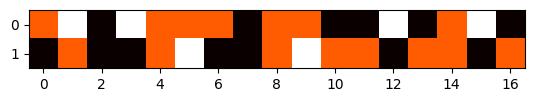

In [53]:
instancia_ = np.array(instancia)

for (i, j) in estado:
    instancia_[i,j] = 2

plt.imshow(instancia_, cmap='hot', interpolation='nearest')
plt.show()

# Ejercicio 8

Se tiene un cubo. Un acomodo bueno consiste en poner sobre sus vértices  8 numeros distintos del 1 al n. Un acomodo es muy bueno si la suma de  los ntimeros en cada cara del cubo es la misma para todas las caras. Da todos los acomodos muy buenos.    

$\textbf{Instancia:}$ Resolver el problema para n = 15. 

Tipo de Problema:

Es del tipos de enlistar pues se requiere encontrar y listar todos los acomodos muy buenos posibles y contar pues al encontrar todos los acomodos, también estamos contando cuántos hay.

Fuerza Bruta:

Como tenemos 8 vértices que deben ser asignados con números distintos del 1 al 𝑛., como el número total de formas de asignar números del 1 al 𝑛 a los 8 vértices es

𝑃(𝑛,8) = $\frac{n!}{(n-8)!}$

por lo que el tiempo es de $O(n^8)$


Herusirtica: 
Vamos a utilizar tres tipos recortes al espacio de estados para reducir el número de combinaciones explorando sólo aquellas que pueden llevar a una solución válida el backtracking en búsquedas combinatorias para asignar variables paso a paso y retroceder cuando se detecta una inconsistencia y programación dinámica al reutilizar cálculos y evitar recomputaciones innecesarias.

Veamos el algoritmo:

- Primero signar los vértices al seleccionar todas las combinaciones posibles de 4 números distintos del 1 al 𝑛 y calcular $𝑆 = 𝑥_0 + 𝑥_1 + 𝑥_2 + 𝑥_3$
- Luego calculamos las umas intermedias:
   -  $s1 = x_0 + x_1$
   -  $s2 = x_2 + x_3$
   -  sum12 = $x_1 + x_2$
   -  sum03  = $x_0 + x_3$
- Despues generamos $x_4$ y calculamos $x_5, x_6, x_7$. Para calcular $x_4$ con los disponibles es $x_5 = s2 - x_4$, $x_7 = sum12 - x_4$ y $x_6 = s1 - x_7$ para verificar que sean validos $x_5, x_6, x_7$ están en el rango [1,n] y son números distintos y no han sido utilizados que satisfacen las ecuaciones derivadas de las caras , ademas $x_4 + x_5 + x_6 +0 x_7 = s$ y $x_5 + x_6 = sum03$
- Si todos los cheques pasan, se tiene un acomodo muy buenoy Almacenar o imprimir la solución encontrada.


Correctitud: 

El algoritmo garantiza que sólo se consideran asignaciones que satisfacen todas las restricciones del problema y las ecuaciones derivadas aseguran que las sumas de las caras son iguales al igual de que e exploran todas las combinaciones posibles de $𝑥_0,x_1,x_2,x_3$ y para cada una, se generan las posibles asignaciones de $x_4,x_5,x_6,x_7$ que cumplen con las restricciones.

Tiempo:

Asignamos de la asignaciones de $𝑥_0,x_1,x_2,x_3$ : $𝑃 = $\frac{n!}{(n-4)!}$ las iteraciones para $𝑥_4$: n-4 y el tootal de iteraciones O(n^4*n)=O(n^5) y las operaciones por iteración es constante, ya que las operaciones aritméticas y verificaciones son de tiempo constante. por lo que la complejidad total es de $𝑂(𝑛^5)$ significativamente mejor que $𝑂(𝑛^8)$ que es mejor que el del algoritmo de fuerza bruta.

In [68]:
from itertools import permutations

In [ ]:
def acomodos_muy_buenos(n):
    soluciones = []
    numeros = set(range(1, n+1))
    for x0, x1, x2, x3 in permutations(numeros, 4):
        S = x0 + x1 + x2 + x3
        s1 = x0 + x1
        s2 = x2 + x3
        sum12 = x1 + x2
        sum03 = x0 + x3
        usados = {x0, x1, x2, x3}
        disponibles = numeros - usados
        for x4 in disponibles:
            x5 = s2 - x4
            x7 = sum12 - x4
            x6 = s1 - x7
            posibles = [x5, x6, x7]
            if all(1 <= xi <= n for xi in posibles):
                if len({x4, x5, x6, x7}) == 4:
                    if not usados & {x4, x5, x6, x7}:
                        if x4 + x5 + x6 + x7 == S:
                            if x5 + x6 == sum03:
                                acomodo = [x0, x1, x2, x3, x4, x5, x6, x7]
                                soluciones.append(acomodo)
    return soluciones

def main():
    n = 15
    soluciones = acomodos_muy_buenos(n)
    print(f"Total de soluciones encontradas: {len(soluciones)}")
    for sol in soluciones:
        print(f"Acomodo muy bueno: {sol}")

if __name__ == "__main__":
    main()


Total de soluciones encontradas: 53616
Acomodo muy bueno: [1, 4, 5, 8, 6, 7, 2, 3]
Acomodo muy bueno: [1, 4, 5, 8, 7, 6, 3, 2]
Acomodo muy bueno: [1, 4, 5, 9, 6, 8, 2, 3]
Acomodo muy bueno: [1, 4, 5, 10, 6, 9, 2, 3]
Acomodo muy bueno: [1, 4, 5, 10, 7, 8, 3, 2]
Acomodo muy bueno: [1, 4, 5, 11, 6, 10, 2, 3]
Acomodo muy bueno: [1, 4, 5, 11, 7, 9, 3, 2]
Acomodo muy bueno: [1, 4, 5, 12, 6, 11, 2, 3]
Acomodo muy bueno: [1, 4, 5, 12, 7, 10, 3, 2]
Acomodo muy bueno: [1, 4, 5, 13, 6, 12, 2, 3]
Acomodo muy bueno: [1, 4, 5, 13, 7, 11, 3, 2]
Acomodo muy bueno: [1, 4, 5, 14, 6, 13, 2, 3]
Acomodo muy bueno: [1, 4, 5, 14, 7, 12, 3, 2]
Acomodo muy bueno: [1, 4, 5, 15, 6, 14, 2, 3]
Acomodo muy bueno: [1, 4, 5, 15, 7, 13, 3, 2]
Acomodo muy bueno: [1, 4, 6, 7, 8, 5, 3, 2]
Acomodo muy bueno: [1, 4, 6, 9, 7, 8, 2, 3]
Acomodo muy bueno: [1, 4, 6, 9, 8, 7, 3, 2]
Acomodo muy bueno: [1, 4, 6, 10, 7, 9, 2, 3]
Acomodo muy bueno: [1, 4, 6, 11, 7, 10, 2, 3]
Acomodo muy bueno: [1, 4, 6, 11, 8, 9, 3, 2]
Acomodo muy 